### Plot deltaE / E as a function of travelled distance inside a medium for muons 

 Consider different kinetic energies for the muon, 1 GeV, 10 GeV, 100 GeV 
 Repeat the exercise inside water, ice and lead  

In [90]:
# First of all execute python script to load the defined functions 

%run functions.py 

In [91]:
import numpy as np  
from astropy import units as u
import matplotlib.pyplot as plt

# Define muon energy 

ek = 1000 * u.MeV
beta = _beta(ek)
gamma = _gamma(ek)
Wmax = _Wmax(ek) 

# Look up material properties (water)
# https://pdg.lbl.gov/2024/AtomicNuclearProperties/HTML/water_liquid.html  

Z_A=0.55509 *u.mol / u.g #mol g^-1, atomic number Z over atomic mass mol g^-1 
rho=1 * u.g / u.cm**3 #g cm^-3, density of liquid water 
I=7.97e-5 * u.MeV #MeV, mean excitation energy

K=0.307075 * u.MeV * u.cm **2 / u.mol #MeV mol^−1 cm2

de_dx(beta,gamma,Wmax,K,Z_A,I,rho)

<Quantity 2.25468424 MeV / cm>

In [92]:
# Define distances for which to compute energy loss 

n = 50 

d_array = np.linspace(1,200,n)

de_e_array_1GeV = np.zeros(n)

for i, d in enumerate(d_array):
    eloss = de_dx(beta,gamma,Wmax, K, Z_A, I, rho) * d * u.cm   
    de_e_array_1GeV[i] = (eloss / ek).value    
    
    
    

In [93]:
# Compute again for different muon energy   

ek = 10000 * u.MeV
beta = _beta(ek)
gamma = _gamma(ek)
Wmax = _Wmax(ek) 

de_e_array_10GeV = np.zeros(n)

for i, d in enumerate(d_array):
    eloss = de_dx(beta,gamma,Wmax, K, Z_A, I, rho) * d * u.cm   
    de_e_array_10GeV[i] = (eloss / ek).value  


ek = 100000 * u.MeV
beta = _beta(ek)
gamma = _gamma(ek)
Wmax = _Wmax(ek) 

de_e_array_100GeV = np.zeros(n)

for i, d in enumerate(d_array):
    eloss = de_dx(beta,gamma,Wmax, K, Z_A, I, rho) * d * u.cm   
    de_e_array_100GeV[i] = (eloss / ek).value  
    

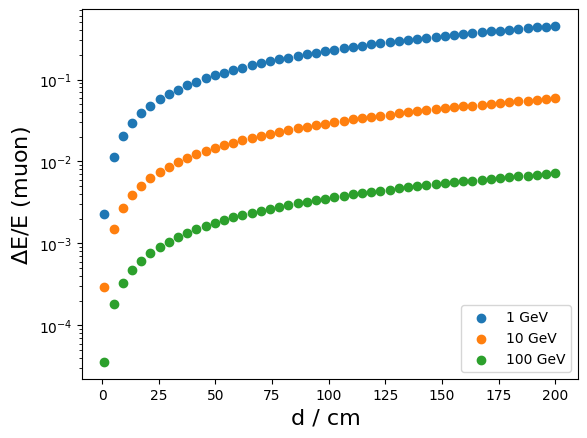

In [94]:
plt.scatter(d_array, de_e_array_1GeV, label='1 GeV' )
plt.scatter(d_array, de_e_array_10GeV, label='10 GeV' )
plt.scatter(d_array, de_e_array_100GeV, label='100 GeV' )

plt.ylabel(r'$\Delta$E/E (muon) ', size=16)
plt.xlabel('d / cm ', size=16)
plt.yscale('log')

plt.legend()

In [ ]:
outdir = './plots/'

plt.savefig(outdir+'deltaE_E_muons.svg',format='svg',bbox_inches='tight')